In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import numpy as np
import requests
import json
from sqlalchemy import create_engine

In [2]:
# Total hate crime for 2017 ,2018 and 2019 
Hatecrime = "Hatecrime.csv"

In [3]:
Hatecrime = pd.read_csv("Hatecrime.csv")
Hatecrime

,S/N,Precinct,Number,Gender,Race,Age,Year,Quarter
0,0,6,1,Male,Hispanic,48,2017,1
1,1,7,2,Male,White,29,2017,1
2,2,7,3,Male,White,29,2017,1
3,3,14,4,Male,Hispanic,64,2017,1
4,4,14,5,Male,Hispanic,64,2017,1
5,5,14,6,Male,Hispanic,64,2017,1
6,6,14,7,Male,Hispanic,64,2017,1
7,7,14,8,Male,Hispanic,64,2017,1
8,8,14,9,Male,Hispanic,64,2017,1
9,9,14,10,Male,Hispanic,64,2017,1


In [4]:
# Show mulitple specific columns required for this project by Gender, Race, precinct and Age

Hatecrime = Hatecrime[["Precinct", "Gender", "Race", "Age"]]
Hatecrime

,Precinct,Gender,Race,Age
0,6,Male,Hispanic,48
1,7,Male,White,29
2,7,Male,White,29
3,14,Male,Hispanic,64
4,14,Male,Hispanic,64
5,14,Male,Hispanic,64
6,14,Male,Hispanic,64
7,14,Male,Hispanic,64
8,14,Male,Hispanic,64
9,14,Male,Hispanic,64


In [5]:
Hatecrime.columns

Index(['Precinct', 'Gender', 'Race', 'Age'], dtype='object')

In [6]:
commited_by_race = Hatecrime["Race"].value_counts()

In [7]:
commited_by_gender = Hatecrime["Gender"].value_counts()

In [10]:
commited_by_pct = Hatecrime["Precinct"].value_counts()

In [11]:
#define age groupn bins 10 to 19, 19-29, 29-39, 39-49, 49-59, 59-69,69-79,79-89
bins = [10, 19, 29, 39, 49, 59, 69, 79, 89]

In [12]:
ages = ["10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89"]

In [19]:
Hatecrime["Age bracket"] = pd.cut(Hatecrime["Age"], bins, labels=ages)
Hatecrime["Age bracket"].value_counts()


20-29    134
30-39    109
10-19     60
40-49     47
50-59     36
60-69     15
70-79      4
80-89      0
Name: Age bracket, dtype: int64

In [21]:
Hatecrime.columns

Index(['S/N', 'Precinct', 'Number', 'Gender', 'Race', 'Age', 'Year', 'Quarter',
       'Age bracket'],
      dtype='object')

In [22]:
# dataframe changed from hatecrime to HATECRIME after age segmentation
Hatecrime

,S/N,Precinct,Number,Gender,Race,Age,Year,Quarter,Age bracket
0,0,6,1,Male,Hispanic,48,2017,1,40-49
1,1,7,2,Male,White,29,2017,1,20-29
2,2,7,3,Male,White,29,2017,1,20-29
3,3,14,4,Male,Hispanic,64,2017,1,60-69
4,4,14,5,Male,Hispanic,64,2017,1,60-69
5,5,14,6,Male,Hispanic,64,2017,1,60-69
6,6,14,7,Male,Hispanic,64,2017,1,60-69
7,7,14,8,Male,Hispanic,64,2017,1,60-69
8,8,14,9,Male,Hispanic,64,2017,1,60-69
9,9,14,10,Male,Hispanic,64,2017,1,60-69


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000243BEF61DA0>],
      dtype=object)

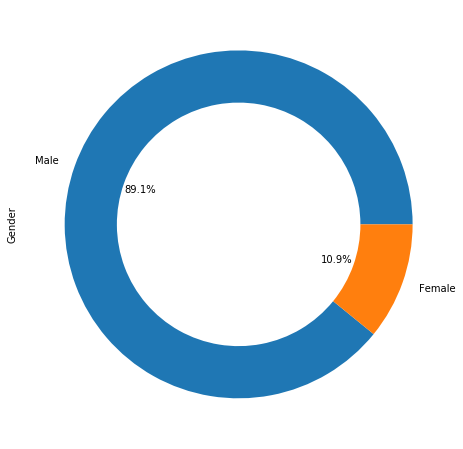

In [36]:
#percentage of male and female hate crime from 2017-2019
Hatecrime["Gender"].value_counts().plot.pie(subplots=True, wedgeprops=dict(width=0.3), figsize=(10, 8), autopct="%1.1f%%")       

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000243BEFA8BE0>],
      dtype=object)

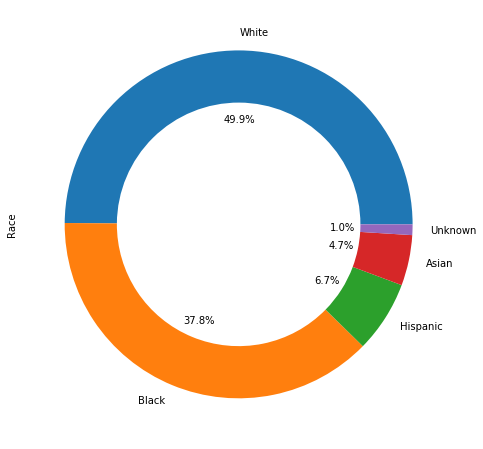

In [37]:
#percentage of Race that commited hate crime for the whole data from 2017-2019
Hatecrime["Race"].value_counts().plot.pie(subplots=True, wedgeprops=dict(width=0.3), figsize=(10, 8), autopct="%1.1f%%")      

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000243BF0F90F0>],
      dtype=object)

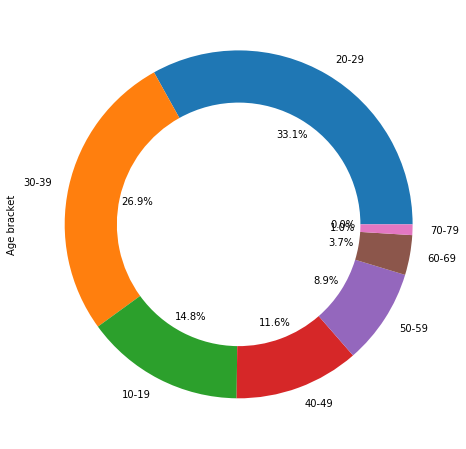

In [39]:
# Age segment percentage of the people committed hate crime
Hatecrime["Age bracket"].value_counts().plot.pie(subplots=True, wedgeprops=dict(width=0.3), figsize=(10, 8), autopct="%1.1f%%")

       

In [78]:
#FB1 Offender's Race, Ethnicity, and Age in 2017....Showing FBI data to compare later with NY

In [79]:
# Store filepath in a variable
FBI_hatecrime = "FB1 Offender's Race, Ethnicity, and Age, 2017.csv"

In [40]:
FBI_hatecrime = pd.read_csv("FB1 Offender's Race, Ethnicity, and Age, 2017.csv")
FBI_hatecrime

,Race/Ethnicity/Age,Total
0,Race,"6,370"
1,White,"3,227"
2,Black or African American,"1,359"
3,American Indian or Alaska Native,49
4,Asian,42
5,Native Hawaiian or Other Pacific Islander,3
6,Group of Multiple Races2,475
7,Unknown Race,"1,215"
8,Ethnicity3,"5,131"
9,Hispanic or Latino,454


In [81]:
FBI_hatecrime.columns

Index(['Race/Ethnicity/Age', 'Total'], dtype='object')

In [41]:
FBI_hatecrime = FBI_hatecrime.rename(columns={"Race/Ethnicity/Age":"Hatecrime"})                      
FBI_hatecrime                      

,Hatecrime,Total
0,Race,"6,370"
1,White,"3,227"
2,Black or African American,"1,359"
3,American Indian or Alaska Native,49
4,Asian,42
5,Native Hawaiian or Other Pacific Islander,3
6,Group of Multiple Races2,475
7,Unknown Race,"1,215"
8,Ethnicity3,"5,131"
9,Hispanic or Latino,454


In [42]:
FBI_hatecrime_formated = FBI_hatecrime.dropna()
FBI_hatecrime_formated

,Hatecrime,Total
0,Race,"6,370"
1,White,"3,227"
2,Black or African American,"1,359"
3,American Indian or Alaska Native,49
4,Asian,42
5,Native Hawaiian or Other Pacific Islander,3
6,Group of Multiple Races2,475
7,Unknown Race,"1,215"
8,Ethnicity3,"5,131"
9,Hispanic or Latino,454


In [43]:
race = FBI_hatecrime_formated.iloc[1:8]
race

,Hatecrime,Total
1,White,"3,227"
2,Black or African American,"1,359"
3,American Indian or Alaska Native,49
4,Asian,42
5,Native Hawaiian or Other Pacific Islander,3
6,Group of Multiple Races2,475
7,Unknown Race,"1,215"


In [44]:
race.groupby("Hatecrime")["Total"].value_counts()

Hatecrime                                  Total
American Indian or Alaska Native           49       1
Asian                                      42       1
Black or African American                  1,359    1
Group of Multiple Races2                   475      1
Native Hawaiian or Other Pacific Islander  3        1
Unknown Race                               1,215    1
White                                      3,227    1
Name: Total, dtype: int64

In [46]:
sizes = race.groupby("Hatecrime")["Total"]

In [65]:
# Labels for the sections of our pie chart
labels = ["American Indian or Alaska Native ", "Asian", "Group of Multiple Races2", "Native Hawaiian", "Unknown Race",  "Black or African American", "White"]

# The values of each section of the pie chart
sizes = [49, 1359, 475, 3, 1215,42, 3227]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "lightskyblue", "black", "blue", "green"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (5, 0, 0, 0, 0, 0, 0)

([<matplotlib.patches.Wedge at 0x243c06daba8>,
 [Text(0.4010894485063716, -1.0242691317699928, 'American Indian or Alaska Native '),
  Text(0.9636700644211595, -0.5304149384571654, 'Asian'),
  Text(1.0125906672139326, 0.42972100329311685, 'Group of Multiple Races2'),
  Text(0.8842156640604931, 0.6543413936394833, 'Native Hawaiian'),
  Text(0.35957800301607157, 1.0395689778687003, 'Unknown Race'),
  Text(-0.31130408528042486, 1.0550306945713561, 'Black or African American'),
  Text(-1.0412325874088237, -0.3547318690474912, 'White')],
 [Text(0.21877606282165724, -0.5586922536927234, '0.8%'),
  Text(0.5256382169569961, -0.2893172391584538, '21.3%'),
  Text(0.5523221821166905, 0.23439327452351827, '7.5%'),
  Text(0.48229945312390526, 0.3569134874397181, '0.0%'),
  Text(0.19613345619058448, 0.5670376242920183, '19.1%'),
  Text(-0.16980222833477718, 0.5754712879480124, '0.7%'),
  Text(-0.5679450476775402, -0.19349011038954064, '50.7%')])

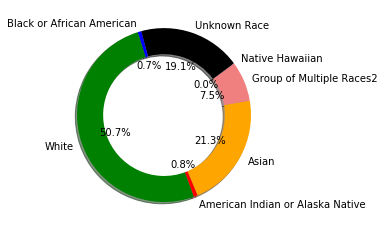

In [66]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, labels=labels, wedgeprops=dict(width=0.3), colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=290)

In [88]:
ethnicity = FBI_hatecrime_formated.iloc[9:13]
ethnicity

,Hatecrime,Total
9,Hispanic or Latino,454
10,Not Hispanic or Latino,"1,284"
11,Group of Multiple Ethnicities4,81
12,Unknown Ethnicity,"3,312"


In [63]:
# Labels for the sections of our pie chart
labels = ["Hispanic or Latino", "Not Hispanic or Latino", "Group of Multiple Ethnicities4", "Unknown Ethnicity"]

# The values of each section of the pie chart
sizes = [454, 1284, 81, 3312]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.0001, 0, 0, 0)

([<matplotlib.patches.Wedge at 0x243c0684710>,
 [Text(-1.0044182545787763, 0.4487359801363431, 'Hispanic or Latino'),
  Text(-0.8796843821977828, -0.6604206142431545, 'Not Hispanic or Latino'),
  Text(-0.10002682548926857, -1.0954426658582088, 'Group of Multiple Ethnicities4'),
  Text(1.0063617420110589, 0.4441126481158435, 'Unknown Ethnicity')],
 [Text(-0.5479060036112386, 0.24478362119790875, '8.8%'),
  Text(-0.47982784483515417, -0.3602294259508115, '25.0%'),
  Text(-0.054560086630510124, -0.5975141813772048, '1.6%'),
  Text(0.5489245865514866, 0.24224326260864187, '64.5%')])

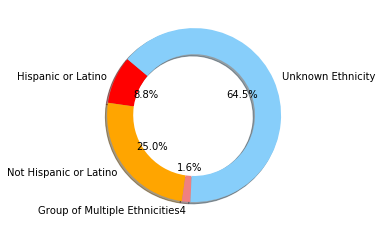

In [64]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, wedgeprops=dict(width=0.3), colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

In [91]:
age = FBI_hatecrimes_formated.iloc[14:]
age

,Hatecrime,Total
14,Total known offenders 18 and over,"4,062"
15,Total known offenders under 18,833


In [92]:
# Labels for the sections of our pie chart
labels = ["Total known offenders 18 and over", "Total known offenders under 18"]

# The values of each section of the pie chart
sizes = [4062, 833]

# The colors of each section of the pie chart
colors = ["red", "blue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0, 0)

([<matplotlib.patches.Wedge at 0x243c0749b00>,
 [Text(-0.8594882174814044, 0.686498364171859, 'American Indian or Alaska Native '),
  Text(-1.0997702258838933, -0.022482220959914433, 'Asian'),
  Text(-0.6620687397957421, -0.8784446389985416, 'Group of Multiple Races2'),
  Text(-0.43858253068077296, -1.0087841016697523, 'Native Hawaiian'),
  Text(0.20838080368035417, -1.0800821453285532, 'Unknown Race'),
  Text(0.7971125934404029, -0.7580313406309234, 'Black or African American'),
  Text(0.7243679374204964, 0.8278231038314744, 'White')],
 [Text(-0.4688117549898569, 0.37445365318465035, '0.8%'),
  Text(-0.5998746686639418, -0.01226302961449878, '21.3%'),
  Text(-0.36112840352495024, -0.4791516212719317, '7.5%'),
  Text(-0.23922683491678523, -0.5502458736380466, '0.0%'),
  Text(0.11366225655292043, -0.5891357156337562, '19.1%'),
  Text(0.4347886873311288, -0.41347164034414, '0.7%'),
  Text(0.39510978404754343, 0.4515398748171678, '50.7%')])

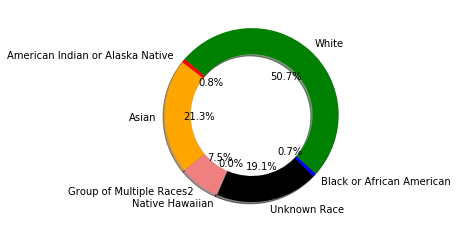

In [67]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, labels=labels, wedgeprops=dict(width=0.3), colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

In [68]:
#xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

In [69]:
# checking inside details of hatecrime

In [70]:
Hatecrime

,S/N,Precinct,Number,Gender,Race,Age,Year,Quarter,Age bracket
0,0,6,1,Male,Hispanic,48,2017,1,40-49
1,1,7,2,Male,White,29,2017,1,20-29
2,2,7,3,Male,White,29,2017,1,20-29
3,3,14,4,Male,Hispanic,64,2017,1,60-69
4,4,14,5,Male,Hispanic,64,2017,1,60-69
5,5,14,6,Male,Hispanic,64,2017,1,60-69
6,6,14,7,Male,Hispanic,64,2017,1,60-69
7,7,14,8,Male,Hispanic,64,2017,1,60-69
8,8,14,9,Male,Hispanic,64,2017,1,60-69
9,9,14,10,Male,Hispanic,64,2017,1,60-69


In [76]:
Hatecrime.columns

Index(['S/N', 'Precinct', 'Number', 'Gender', 'Race', 'Age', 'Year', 'Quarter',
       'Age bracket'],
      dtype='object')

In [99]:
# Show mulitple specific columns by adding Year for Analysis

Hatecrime_year = Hatecrime[["Precinct", "Gender", "Race", "Age", "Year"]]
Hatecrime_year

,Precinct,Gender,Race,Age,Year
0,6,Male,Hispanic,48,2017
1,7,Male,White,29,2017
2,7,Male,White,29,2017
3,14,Male,Hispanic,64,2017
4,14,Male,Hispanic,64,2017
5,14,Male,Hispanic,64,2017
6,14,Male,Hispanic,64,2017
7,14,Male,Hispanic,64,2017
8,14,Male,Hispanic,64,2017
9,14,Male,Hispanic,64,2017


In [100]:
#define bins as 10 to 19, 19-29, 29-39, 39-49, 49-59, 59-69,69-79,79-89
bins_Y = [10, 19, 29, 39, 49, 59, 69, 79, 89]

In [101]:
groupy_names = ["denarian(10-19)", "vicenarian(20-29)", "tricenarian(30-39)", "quadragenarian(40-49)", "quinquagenarian(50-59)", "sexagenarian(60-69)", "septuagenarian(70-79)", "octogenarian(80-89)"]

In [102]:
Hatecrime_year["Age bracket"] = pd.cut(Hatecrime["Age"], bins_Y, labels=groupy_names)
Hatecrime_year["Age bracket"].value_counts()


C:\Users\chaim\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


vicenarian(20-29)         134
tricenarian(30-39)        109
denarian(10-19)            60
quadragenarian(40-49)      47
quinquagenarian(50-59)     36
sexagenarian(60-69)        15
septuagenarian(70-79)       4
octogenarian(80-89)         0
Name: Age bracket, dtype: int64

In [103]:
Hatecrime_year.columns

Index(['Precinct', 'Gender', 'Race', 'Age', 'Year', 'Age bracket'], dtype='object')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000243CDB9A080>,
      dtype=object)

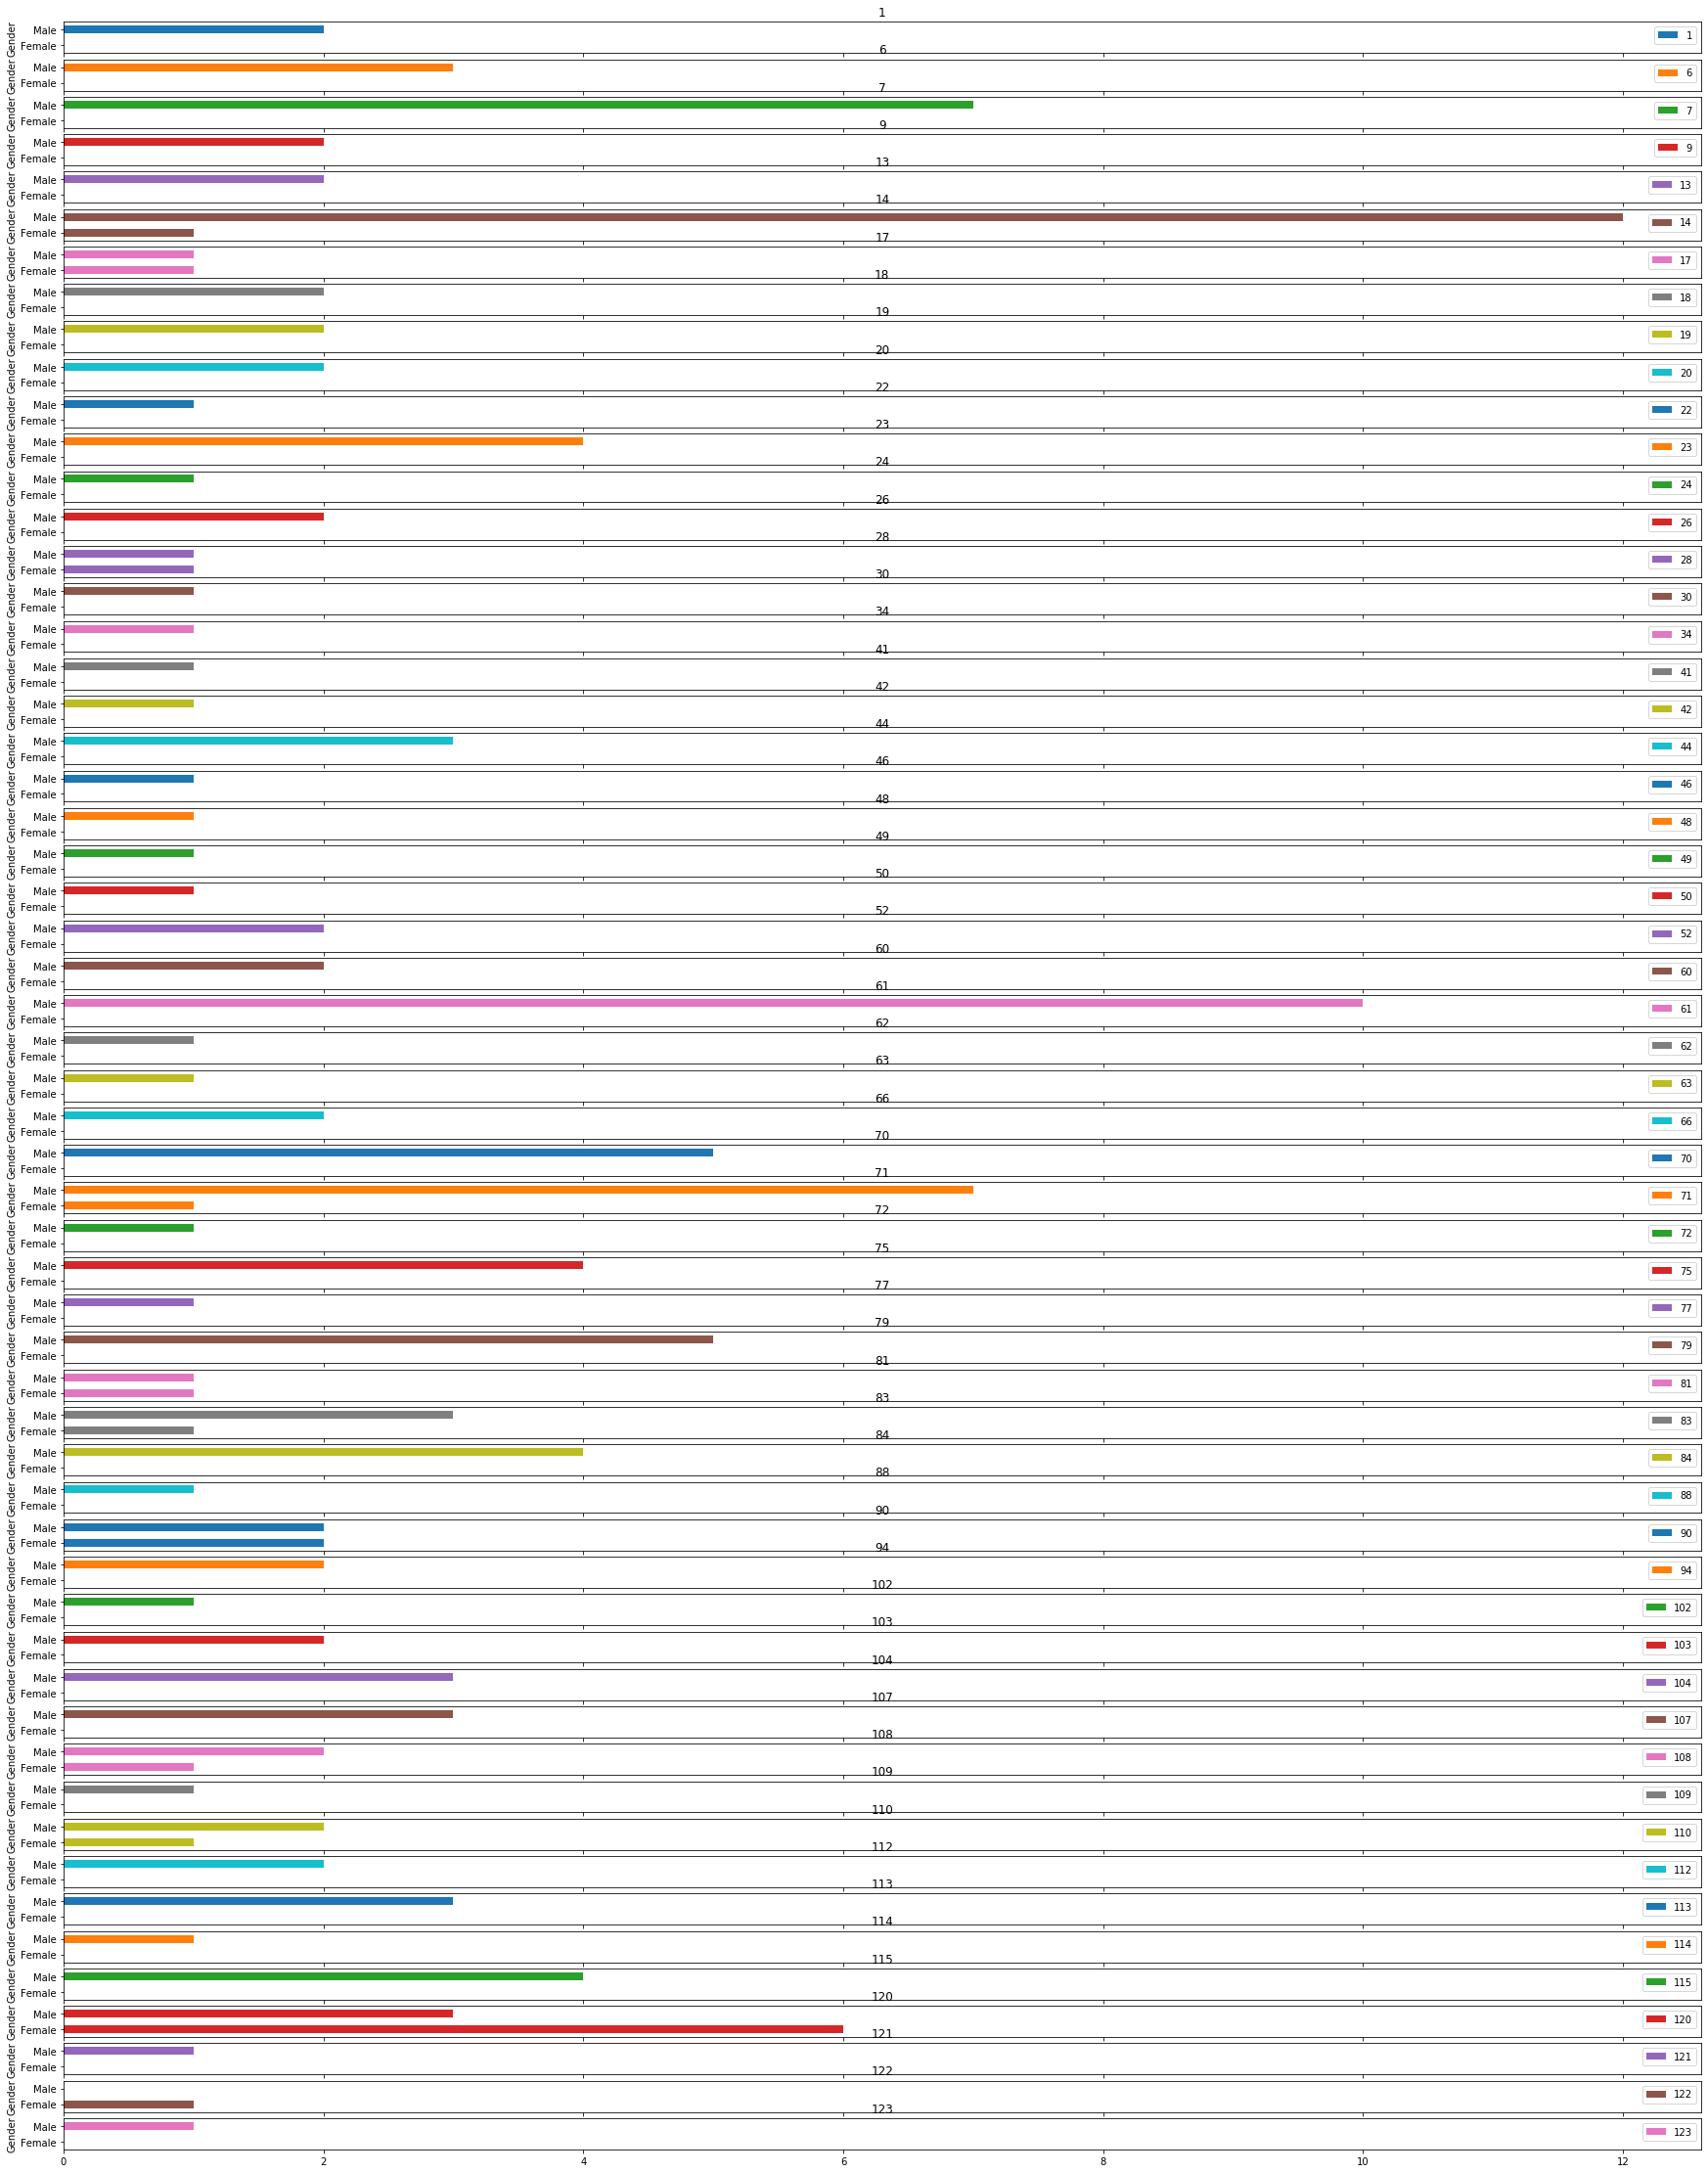

In [104]:
# checking just 2017 data from the whole data for precinct and Gender to determine which Gender commited highest hate crime and from which precinct

#male in precinct 14. 61 ,7 and 71  has the highest/commited highest hate crime in descending order

#and female in precinct 120 commited higest hate crime

Hatecrime_year[Hatecrime_year.Year==2017].groupby(["Precinct","Gender"]).size().unstack(0).plot(kind="barh", subplots=True, figsize=(30, 40))


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000243CDA4E358>,
      dtype=object)

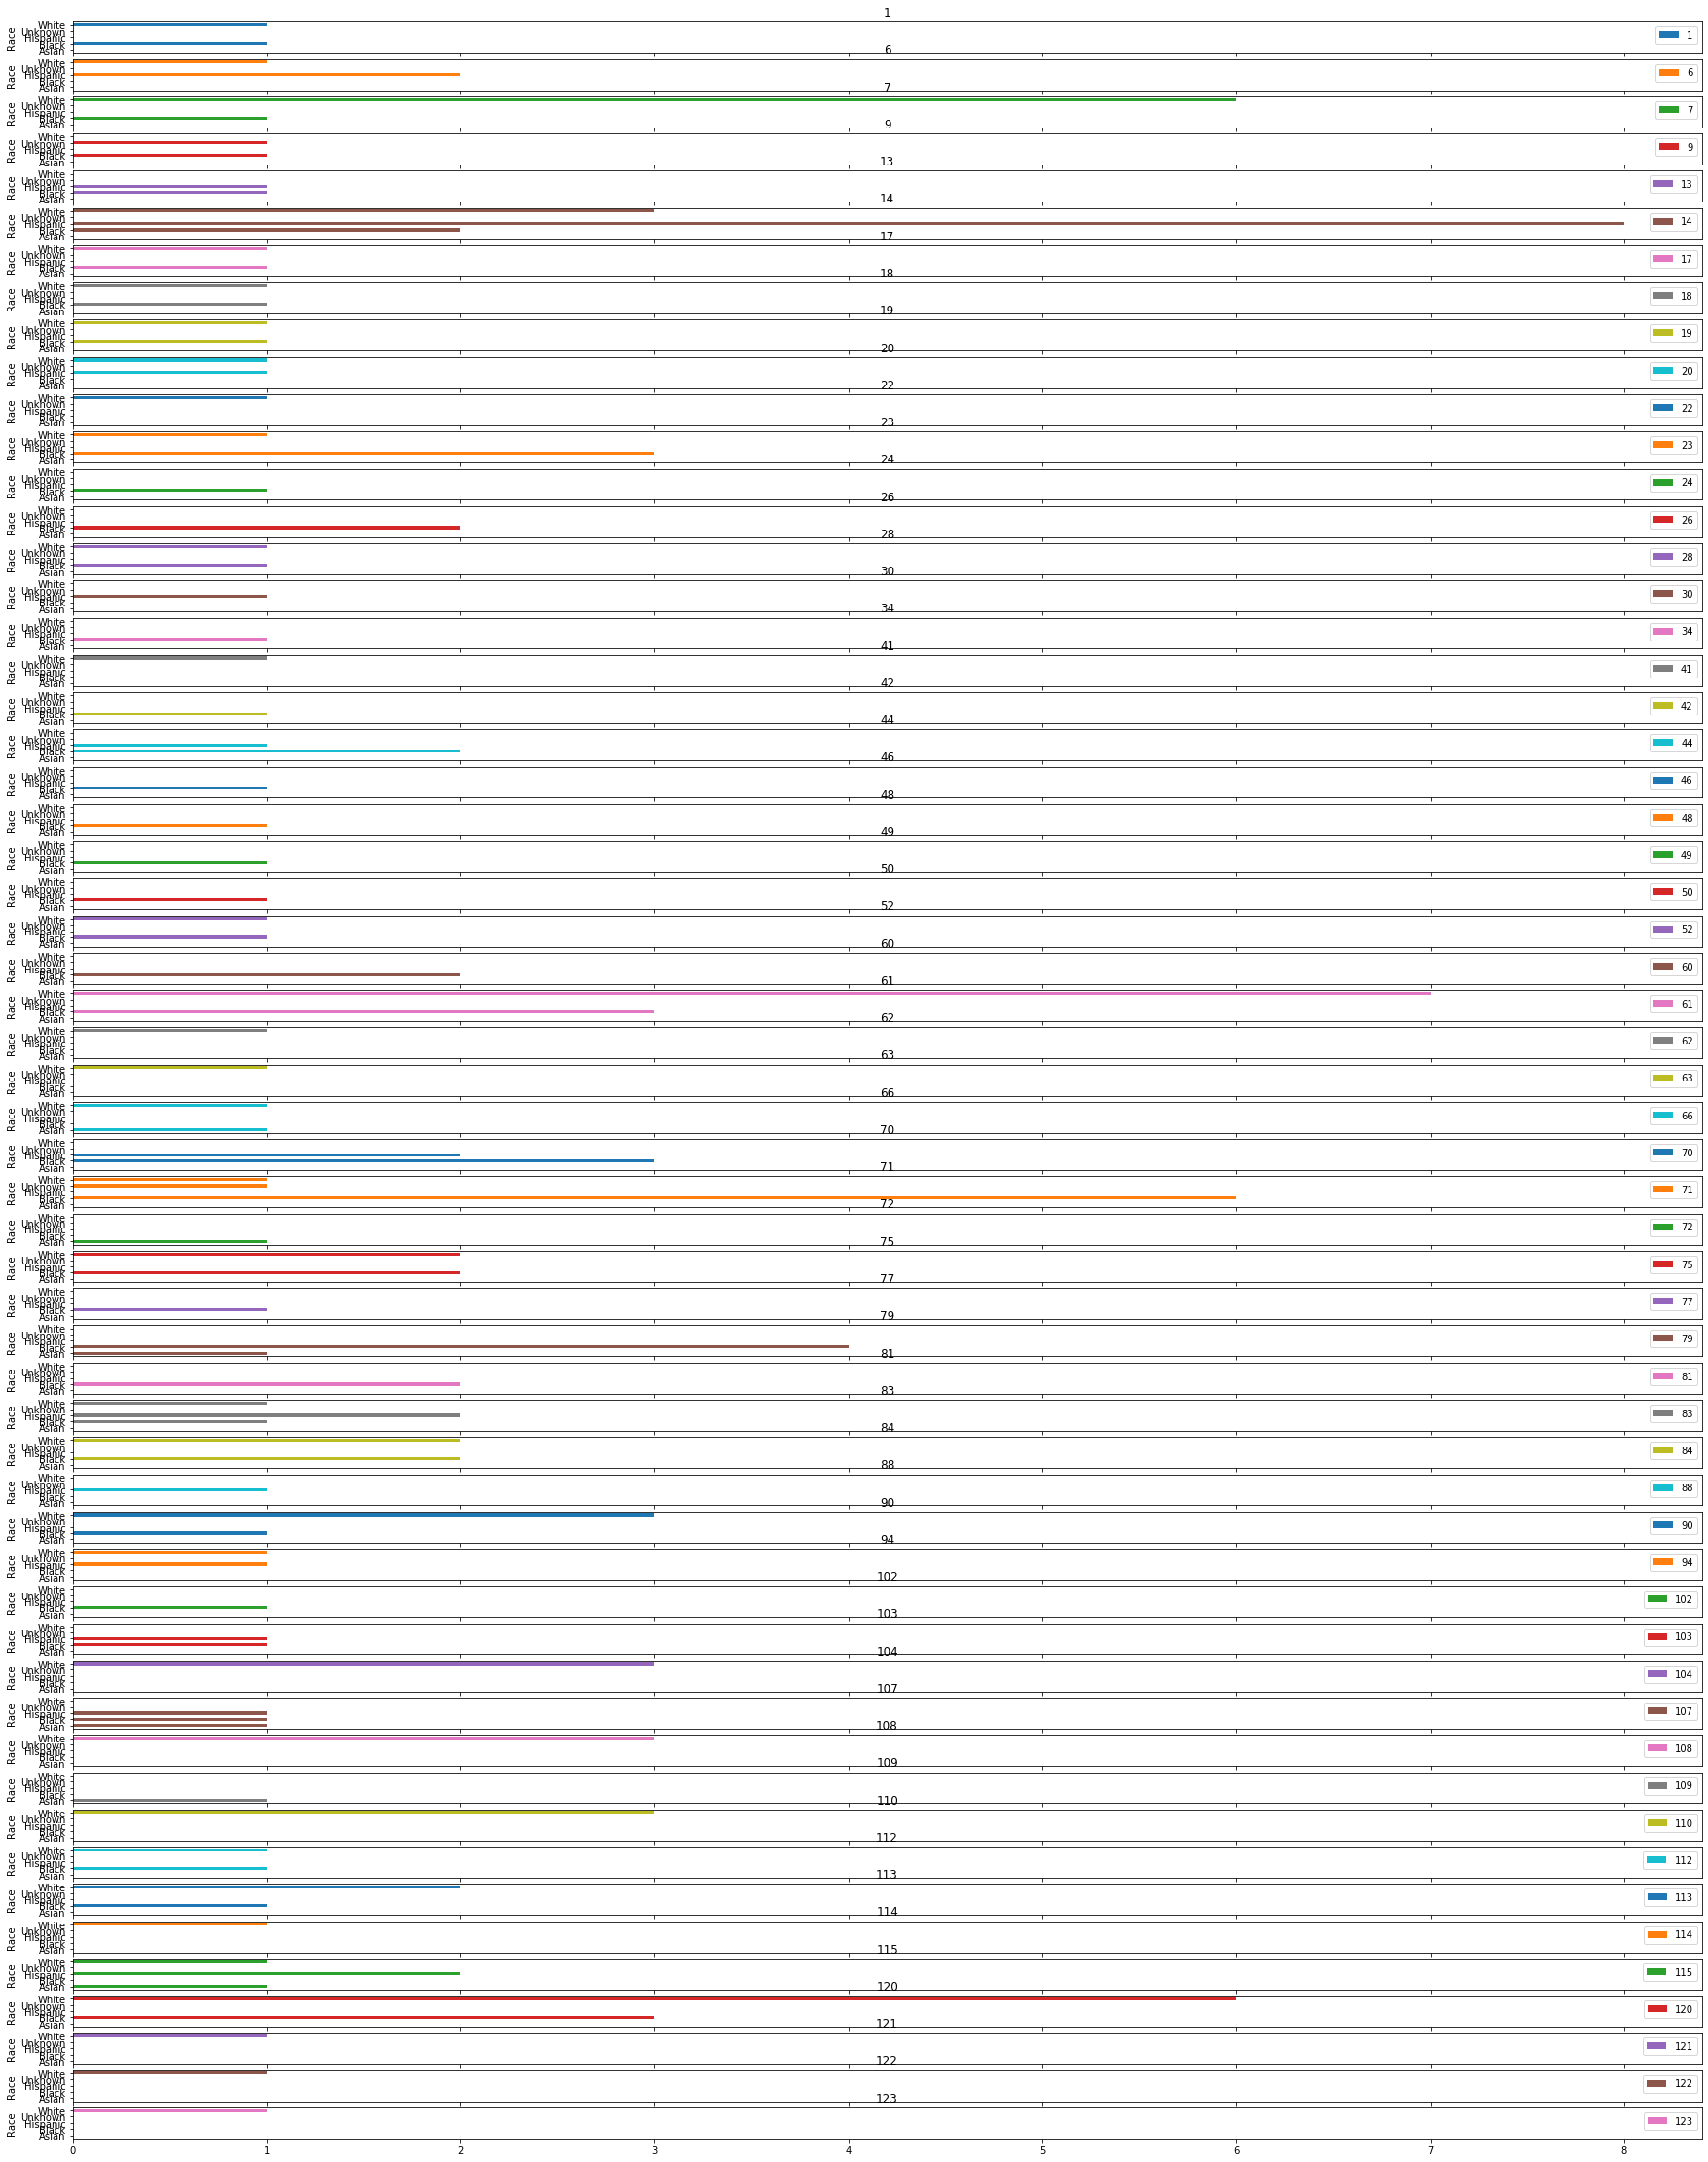

In [105]:
Hatecrime_year[Hatecrime_year.Year==2017].groupby(["Precinct","Race"]).size().unstack(0).plot(kind="barh", subplots=True, figsize=(30, 40))


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000243D13A50F0>,
      dtype=object)

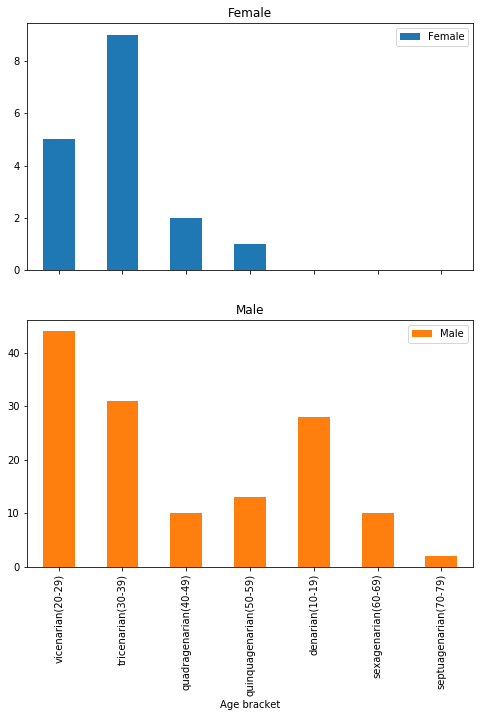

In [106]:
# getting the Gender /the age bracket commiting highest hate crime for 2017
# ages from 20-29 Male commited highest hate crime in 2017 and 30-39 for female
Hatecrime_year[Hatecrime_year.Year==2017].groupby(["Gender","Age bracket"]).size().unstack(0).plot(kind="bar", subplots=True, figsize=(8, 10))


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000243D13A5160>,
      dtype=object)

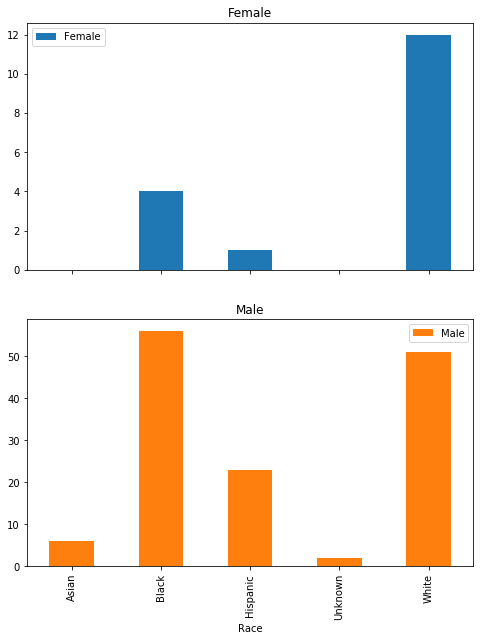

In [107]:
# white and black men and women commited highest hate crime in 2017
Hatecrime_year[Hatecrime_year.Year==2017].groupby(["Gender","Race"]).size().unstack(0).plot(kind="bar", subplots=True, figsize=(8, 10))


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000243D36D26A0>,
      dtype=object)

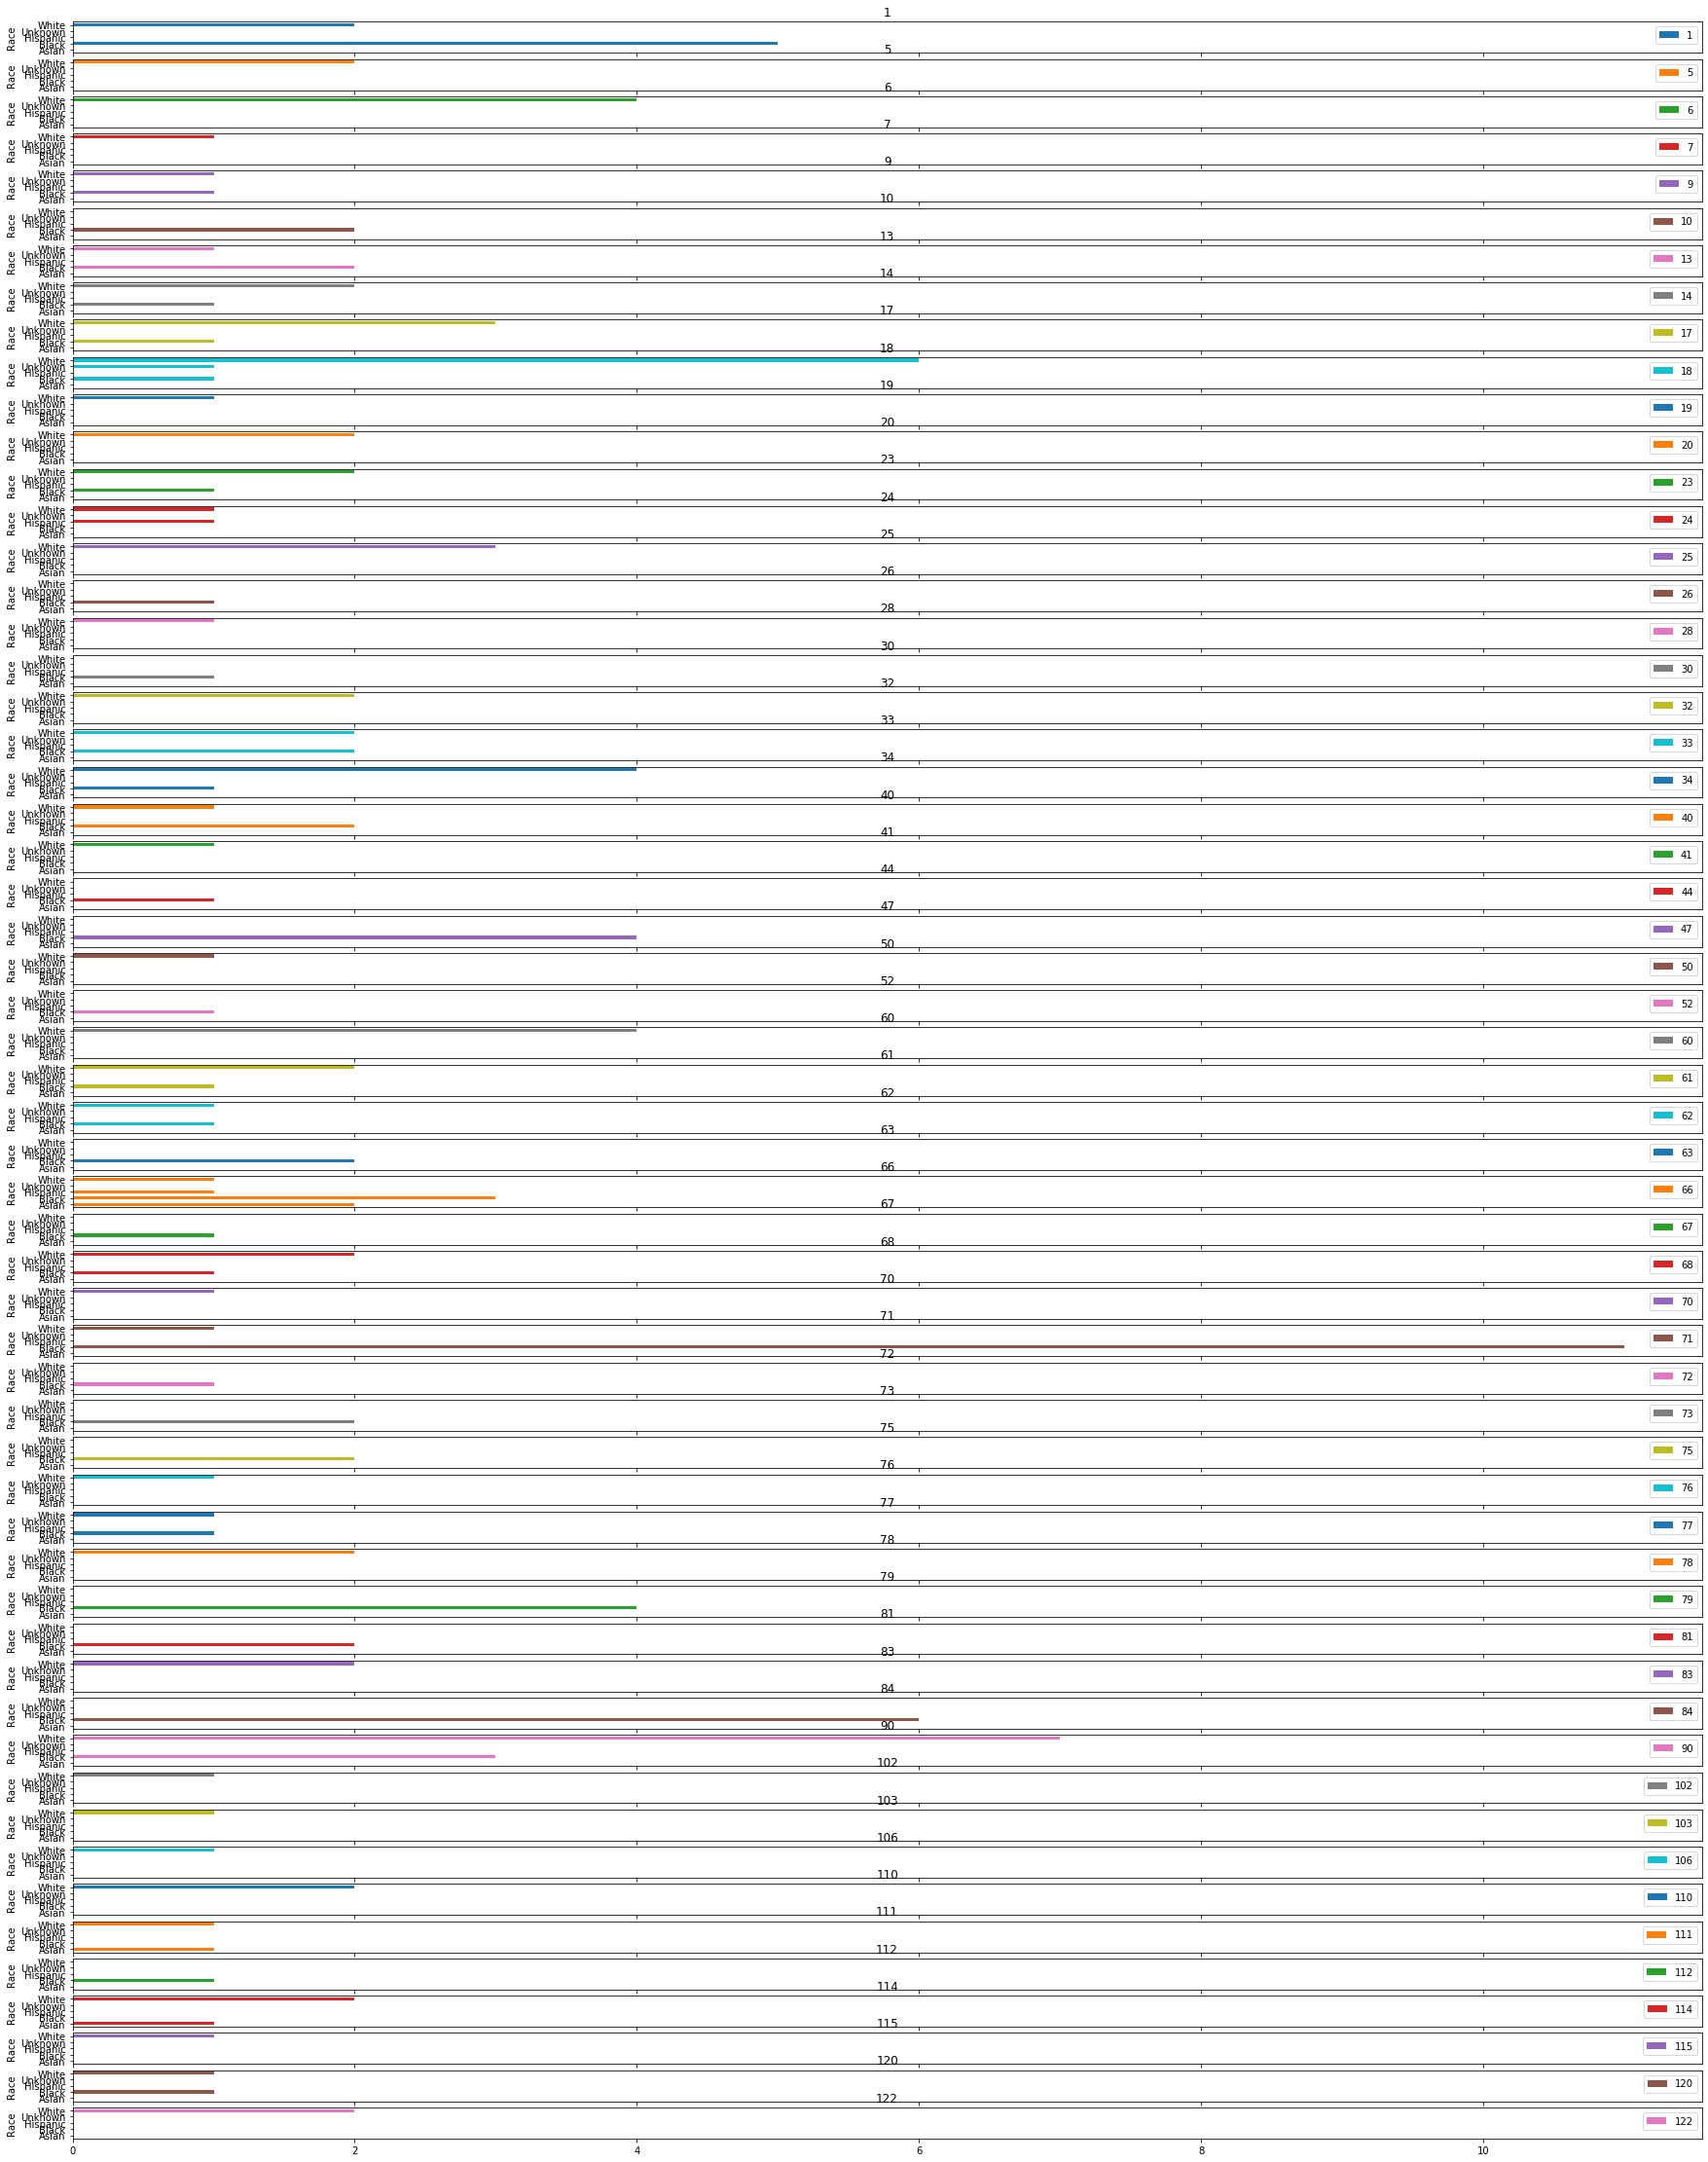

In [108]:
# for 2018 data
# precinct 71  has the highest/commited highest hate crime in descending order

Hatecrime_year[Hatecrime_year.Year==2018].groupby(["Precinct","Race"]).size().unstack(0).plot(kind="barh", subplots=True, figsize=(30, 40))


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000243D86627F0>,
      dtype=object)

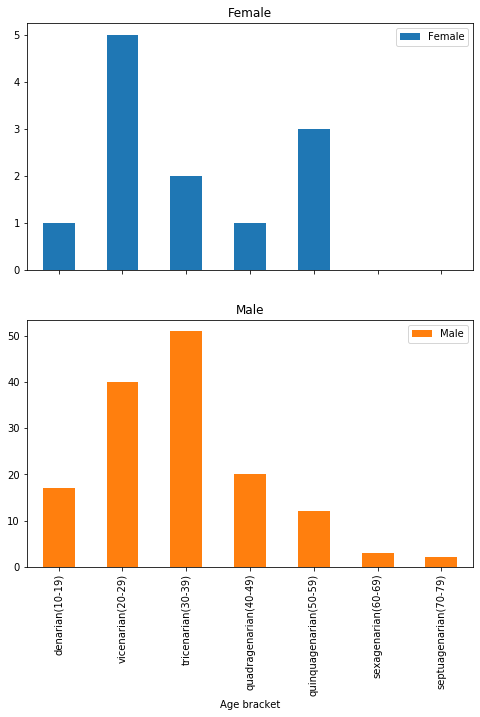

In [109]:
#ages from 30-39 followed by 20-29 Male commited highest hate crime in 2018 and 30-39 folllowed by 50-59 for female commited highest hate crime

Hatecrime_year[Hatecrime_year.Year==2018].groupby(["Gender","Age bracket"]).size().unstack(0).plot(kind="bar", subplots=True, figsize=(8, 10))


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000243D8662DD8>,
      dtype=object)

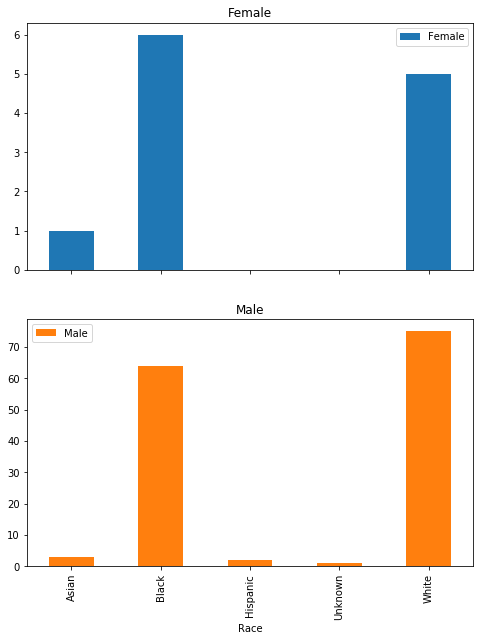

In [110]:

# white and black men and women commited highest hate crime in 2018 consistent with 2017 data
Hatecrime_year[Hatecrime_year.Year==2018].groupby(["Gender","Race"]).size().unstack(0).plot(kind="bar", subplots=True, figsize=(8, 10))


In [117]:
connection_string = "postgres:POSTGRES@localhost:5432/nyc_arrest_db"
engine = create_engine(f'postgresql://{connection_string}')

In [118]:
engine.table_names()

['arrest_1718', 'Hatecrime', 'Hatecrime_year']

In [119]:
### Load DataFrames into database
Hatecrime_year.to_sql(name='Hatecrime_year', con=engine, if_exists='append', index=True)